In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!pip install quandl
import quandl

In [10]:
df=quandl.get('NSE/MRF')

In [11]:
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
1998-03-20,1840.0,1940.0,1840.0,NaN,NaN,NaN,NaN
1998-03-24,1950.0,2025.0,1950.0,2000.0,2000.0,650.0,12.85
1998-03-25,2100.0,2100.0,2100.0,2100.0,2100.0,50.0,1.05
1998-03-26,2125.0,2150.0,2055.0,2055.0,2055.0,250.0,5.28
1998-03-27,2020.0,2040.0,2020.0,2040.0,2040.0,150.0,3.05


In [12]:
df

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
1998-03-20,1840.0,1940.0,1840.00,NaN,NaN,NaN,NaN
1998-03-24,1950.0,2025.0,1950.00,2000.0,2000.00,650.0,12.85
1998-03-25,2100.0,2100.0,2100.00,2100.0,2100.00,50.0,1.05
1998-03-26,2125.0,2150.0,2055.00,2055.0,2055.00,250.0,5.28
1998-03-27,2020.0,2040.0,2020.00,2040.0,2040.00,150.0,3.05
...,...,...,...,...,...,...,...
2018-12-31,67550.0,67550.0,66812.40,66830.0,66984.70,5943.0,3984.95
2019-01-01,67299.0,67299.0,66500.35,66801.0,66801.20,4193.0,2797.59
2019-01-02,66500.0,67100.0,66150.70,66700.0,66635.50,7531.0,5013.96


In [13]:
!pip install yfinance
import yfinance as yf

In [14]:
df1 = yf.download('MRF.NS')

[*********************100%***********************]  1 of 1 completed


In [15]:
df1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-01,910.0,910.00000,880.000000,897.599976,811.283936,426
2002-07-02,900.0,905.00000,895.000000,903.650024,816.752502,310
2002-07-03,910.0,910.00000,900.000000,906.700012,819.509033,336
2002-07-04,920.0,925.00000,910.000000,916.799988,828.637695,591
2002-07-05,915.0,935.00000,910.000000,927.299988,838.127869,1623
...,...,...,...,...,...,...
2024-09-05,136250.0,136666.00000,135500.000000,136017.093750,136017.093750,3971
2024-09-06,136350.0,136700.00000,134042.453125,134260.750000,134260.750000,3820
2024-09-09,135000.0,135000.00000,132600.000000,133979.296875,133979.296875,6107


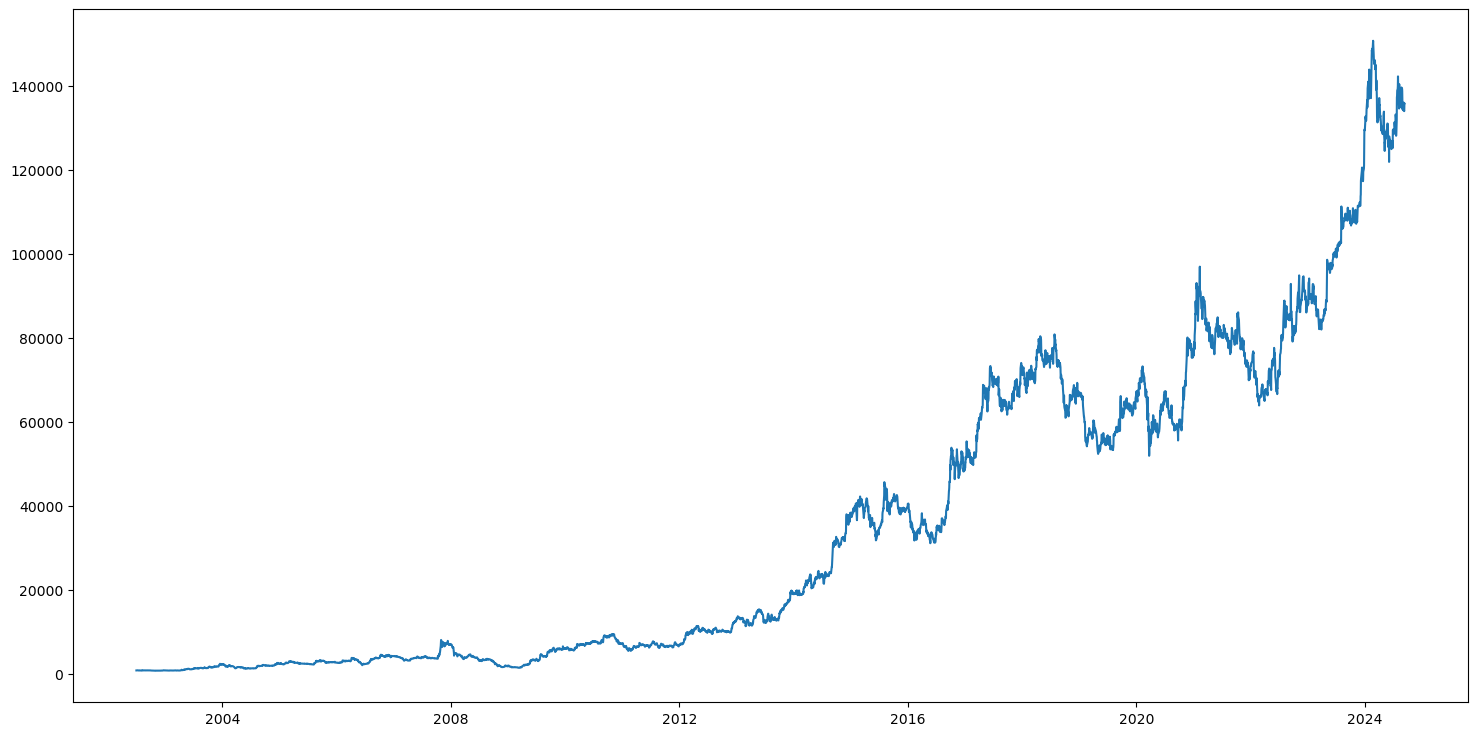

In [17]:
plt.figure(figsize=(18,9))
plt.plot(df1['Close'], label='Closing Price')

In [26]:
df1=df1.dropna()

In [33]:
df1['Open-Close']= df1['Open']-df1['Close']

In [34]:
df1['High-Low']=df1['High']-df1['Close']

In [59]:
x=df1[['Open-Close' , 'High-Low']]
x

,Open-Close,High-Low
Date,,
2002-07-01,12.400024,12.400024
2002-07-02,-3.650024,1.349976
2002-07-03,3.299988,3.299988
2002-07-04,3.200012,8.200012
2002-07-05,-12.299988,7.700012
...,...,...
2024-09-05,232.906250,648.906250
2024-09-06,2089.250000,2439.250000
2024-09-09,1020.703125,1020.703125


In [54]:
#creating labels
y=np.where(df1['Close'].shift(-1) > df1['Close'], 1,-1)

In [60]:
#we will buy at +1 label and sell at -1 label
y

array([ 1,  1,  1, ...,  1,  1, -1])

In [61]:
y.size

5511

In [62]:
#we will drop last element of array y as it is unwanted
#y=y[:-1] ------ giving error in train test splitting

In [63]:
#y.size  ------ giving error in train test splitting

In [72]:
#splitting data for training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.20)

**Implementing KNN for classification(will predict to buy or sell stock)**

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#using gridsearch to find value of K
params = {'n_neighbors' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn,params,cv=5)

In [74]:
#fitiing of model
model.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [75]:
#accuracy score
accscore_train = accuracy_score(ytrain, model.predict(xtrain))
accscore_test = accuracy_score(ytest, model.predict(xtest))
print('Train data accuracy:', accscore_train)
print('Test data accuracy:', accscore_test)

Train data accuracy: 0.7513611615245009
Test data accuracy: 0.4886672710788758


In [77]:
#sample output prediction of this model
prediction_classification = model.predict(xtest)
actual_prediction_df = pd.DataFrame({'Actual label':ytest, 'Predicted label':prediction_classification})
actual_prediction_df.head(20)

,Actual label,Predicted label
0,1,-1
1,-1,-1
2,-1,-1
3,1,-1
4,-1,-1
5,-1,1
6,-1,1
7,-1,-1
8,1,-1
9,-1,-1


**Implementing KNN for Regression (will predict the closing price of the stock)**

In [78]:
#creating label
yreg= df1['Close']
yreg

Date
2002-07-01       897.599976
2002-07-02       903.650024
2002-07-03       906.700012
2002-07-04       916.799988
2002-07-05       927.299988
                  ...      
2024-09-05    136017.093750
2024-09-06    134260.750000
2024-09-09    133979.296875
2024-09-10    135759.406250
2024-09-11    135785.843750
Name: Close, Length: 5511, dtype: float64

In [79]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

In [80]:
#splitting of data into test and train data
xtrainreg,xtestreg,ytrainreg,ytestreg= train_test_split(x,yreg,test_size=0.20)

In [82]:
#using gridsearch to find the best parameter of k
paramsreg = {'n_neighbors' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knnreg = neighbors.KNeighborsRegressor()
modelreg = GridSearchCV(knnreg,paramsreg,cv=5)

In [83]:
#model fitting
modelreg.fit(xtrainreg,ytrainreg)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [86]:
prediction_regression= modelreg.predict(xtestreg)
prediction_regression

array([ 1916.88666992,  5355.58334147, 53798.95061849, ...,
       60221.18671875,  7030.88002116,   886.97333984])

In [87]:
actual_regprediction_df= pd.DataFrame({'Actual close' :ytestreg, 'Predicted close' : prediction_regression})
actual_regprediction_df

,Actual close,Predicted close
Date,,
2005-04-21,2698.699951,1916.886670
2003-05-05,1112.849976,5355.583341
2014-12-15,37880.148438,53798.950618
2015-01-14,38235.351562,18871.016536
2014-05-09,21417.199219,6396.153296
...,...,...
2003-10-09,1751.400024,3599.070020
2006-09-06,3836.449951,3431.866650
2017-07-04,70350.296875,60221.186719
